In [14]:
import matplotlib.pyplot as plt
import ray
from ray.rllib.agents import ppo
from ray.rllib.models import ModelCatalog
from tqdm import tqdm

import sys
sys.path.insert(1, '/home/lorenzo/Desktop/master_thesis/scripts')

from aie import plotting
from aie.aie_env import AIEEnv
from rl.conf import BASE_PPO_CONF
from aie.env_conf import ENV_US, ENV_ITALY, ENV_COMMUNISM
from rl.models.tf.fcnet import FCNet
import pandas as pd

In [2]:
ray.init()
ModelCatalog.register_custom_model("my_model", FCNet)

2021-11-11 16:51:36,018	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


2021-11-11 16:51:36,917	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-11-11 16:51:36,918	INFO trainer.py:641 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-11-11 16:51:38,716	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-11 16:51:38,893	WARNING deprecation.py:33 -- DeprecationWarning: `TFModelV2.register_variables` has been deprecated. This will raise an error in the future!
2021-11-11 16:51:42,284	INFO trainable.py:371 -- Restored on 10.201.20.41 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/FREE/checkpoint_12200/checkpoint-12200
2021-11-11 16:51:42,285	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 12200, '_timesteps_total': None, '_time_total': 631871.9790458679, '_episodes_total': 146400

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65fecfec40>,
      dtype=object)

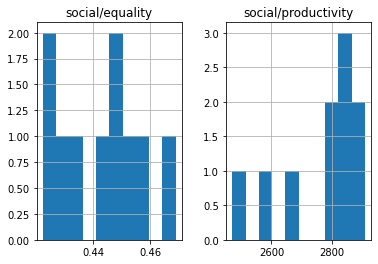

In [3]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/FREE/checkpoint_12200/checkpoint-12200'
trainer.restore(str(ckpt_path))
env = AIEEnv({}, force_dense_logging=True)

df = pd.DataFrame()

for i in tqdm(range(10)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    df = df.append(env.env.scenario_metrics(),ignore_index=True)

df.hist(column=['social/equality','social/productivity'])

2021-11-11 16:52:56,612	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-11 16:53:00,710	INFO trainable.py:371 -- Restored on 10.201.20.41 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/US/checkpoint_20020/checkpoint-20020
2021-11-11 16:53:00,712	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 20020, '_timesteps_total': None, '_time_total': 656971.363036871, '_episodes_total': 240180}
100%|██████████| 10/10 [01:17<00:00,  7.78s/it]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f663830f220>,
      dtype=object)

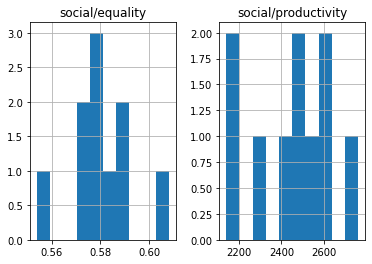

In [4]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/US/checkpoint_20020/checkpoint-20020'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_US, force_dense_logging=True)

dfUs = pd.DataFrame()
for i in tqdm(range(10)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfUs = dfUs.append(env.env.scenario_metrics(),ignore_index=True)
    
dfUs.hist(column=['social/equality','social/productivity'])

2021-11-11 16:54:20,980	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-11 16:54:24,444	INFO trainable.py:371 -- Restored on 10.201.20.41 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/ITA/checkpoint_14626/checkpoint-14626
2021-11-11 16:54:24,445	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 14626, '_timesteps_total': None, '_time_total': 1022582.4275901318, '_episodes_total': 175500}
100%|██████████| 10/10 [01:06<00:00,  6.63s/it]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65fedcb430>,
      dtype=object)

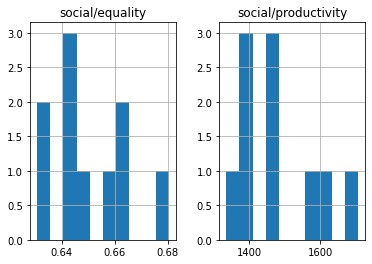

In [5]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/ITA/checkpoint_14626/checkpoint-14626'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_ITALY, force_dense_logging=True)

dfIta = pd.DataFrame()
for i in tqdm(range(10)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfIta = dfIta.append(env.env.scenario_metrics(),ignore_index=True)
    
dfIta.hist(column=['social/equality','social/productivity'])

2021-11-11 16:58:26,615	WARNING deprecation.py:33 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-11-11 16:58:31,460	INFO trainable.py:371 -- Restored on 10.201.20.41 from checkpoint: /home/lorenzo/Desktop/master_thesis/ray_results/COMM/checkpoint_10270/checkpoint-10270
2021-11-11 16:58:31,462	INFO trainable.py:379 -- Current state after restoring: {'_iteration': 10270, '_timesteps_total': None, '_time_total': 243507.28930974007, '_episodes_total': 123240}
100%|██████████| 10/10 [01:12<00:00,  7.26s/it]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6638187d30>,
      dtype=object)

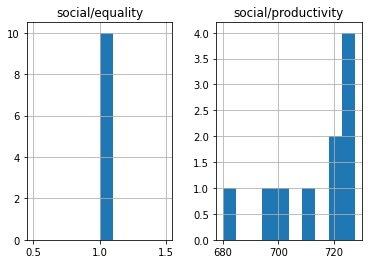

In [16]:
trainer = ppo.PPOTrainer(config={
    **BASE_PPO_CONF,
    "num_workers": 0,
})

ckpt_path = '/home/lorenzo/Desktop/master_thesis/ray_results/COMM/checkpoint_10270/checkpoint-10270'
trainer.restore(str(ckpt_path))
env = AIEEnv(ENV_COMMUNISM, force_dense_logging=True)

dfComm = pd.DataFrame()
for i in tqdm(range(10)):
    obs = env.reset()
    for t in range(1000):
        results = {
            k: trainer.compute_action(
                v,
                policy_id='learned',
                explore=False,
            )
            for k, v in obs.items()
        }
        obs, reward, done, info = env.step(results)
    dfComm = dfComm.append(env.env.scenario_metrics(),ignore_index=True)
    
dfComm.hist(column=['social/equality','social/productivity'])

In [17]:
descr = dfComm.describe()

In [18]:
descr[['social/equality','social/productivity']]


,social/equality,social/productivity
count,10.0,10.000000
mean,1.0,713.076742
std,0.0,15.786504
min,1.0,679.896190
25%,1.0,704.391430
50%,1.0,718.618178
75%,1.0,724.395419
max,1.0,727.600680


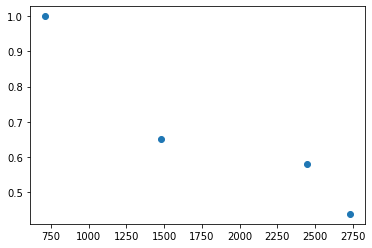

In [19]:
x = [2728.7162, 2449.2935, 1480.1034, 713.0767]
y = [0.4379, 0.5801, 0.6503, 1]
plt.scatter(x,y)